# Importing the Libraries

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

# Loading the Dataset

In [2]:
df = pd.read_csv('WineQT.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


# Exploratory Data analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [3]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


# Finding out that the unique values count

In [7]:
counts = df['quality'].value_counts()
print(counts)

5    483
6    462
7    143
4     33
8     16
3      6
Name: quality, dtype: int64


# Dropping the Id Column 

In [14]:
df.drop('Id', axis = 1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6


# Zipping the features to form it into a single variable

In [38]:
x1 = df['fixed acidity']
x2 = df['alcohol']
x3 = df['pH']
x4 = df['citric acid']
x5 = df['residual sugar']
x6 = df['density']
y = df['quality']
features = list(zip(x1,x2,x3,x4,x5,x6))
print(features)


[(7.4, 9.4, 3.51, 0.0, 1.9, 0.9978), (7.8, 9.8, 3.2, 0.0, 2.6, 0.9968), (7.8, 9.8, 3.26, 0.04, 2.3, 0.997), (11.2, 9.8, 3.16, 0.56, 1.9, 0.998), (7.4, 9.4, 3.51, 0.0, 1.9, 0.9978), (7.4, 9.4, 3.51, 0.0, 1.8, 0.9978), (7.9, 9.4, 3.3, 0.06, 1.6, 0.9964), (7.3, 10.0, 3.39, 0.0, 1.2, 0.9946), (7.8, 9.5, 3.36, 0.02, 2.0, 0.9968), (6.7, 9.2, 3.28, 0.08, 1.8, 0.9959), (5.6, 9.9, 3.58, 0.0, 1.6, 0.9943), (7.8, 9.1, 3.26, 0.29, 1.6, 0.9974), (8.5, 10.5, 3.3, 0.56, 1.8, 0.9969), (7.9, 9.2, 3.04, 0.51, 1.8, 0.9969), (7.6, 9.7, 3.52, 0.31, 2.3, 0.9982), (7.9, 9.5, 3.17, 0.21, 1.6, 0.9966), (8.5, 9.4, 3.17, 0.11, 2.3, 0.9968), (6.9, 9.7, 3.43, 0.14, 2.4, 0.9968), (6.3, 9.3, 3.34, 0.16, 1.4, 0.9955), (7.6, 9.5, 3.28, 0.24, 1.8, 0.9962), (7.1, 9.4, 3.47, 0.0, 1.9, 0.9972), (7.8, 9.8, 3.38, 0.0, 2.0, 0.9964), (6.7, 10.1, 3.35, 0.07, 2.4, 0.9958), (8.3, 9.8, 3.17, 0.12, 2.3, 0.9966), (5.2, 9.2, 3.38, 0.25, 1.8, 0.9957), (7.8, 9.6, 3.4, 0.0, 5.5, 0.9986), (7.8, 10.8, 3.42, 0.14, 2.4, 0.9975), (8.1, 9.7,

# Plotting a Scatter Plot for quality and alcohol quantity in wine

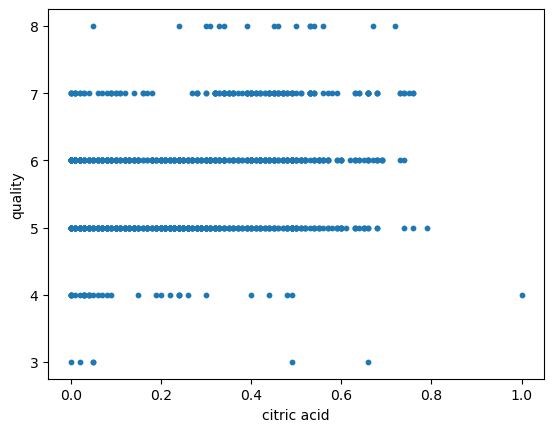

In [39]:
plt.scatter(x4,y, s = 10)
plt.xlabel("citric acid")
plt.ylabel("quality")
plt.show()

# Splitting Data into Training and Testing Phase 

In [40]:
X_train, X_test, y_train, y_test = train_test_split(features,y, test_size = 0.2, random_state = 0)
model = KNeighborsClassifier(n_neighbors = 40)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=40)

# Predicting our model

In [41]:
prediction = model.predict(X_test)

# Finding out the accuracy of our model

In [44]:
accuracy = accuracy_score(y_test, prediction)
print(accuracy*100, " % ")

66.8122270742358  % 


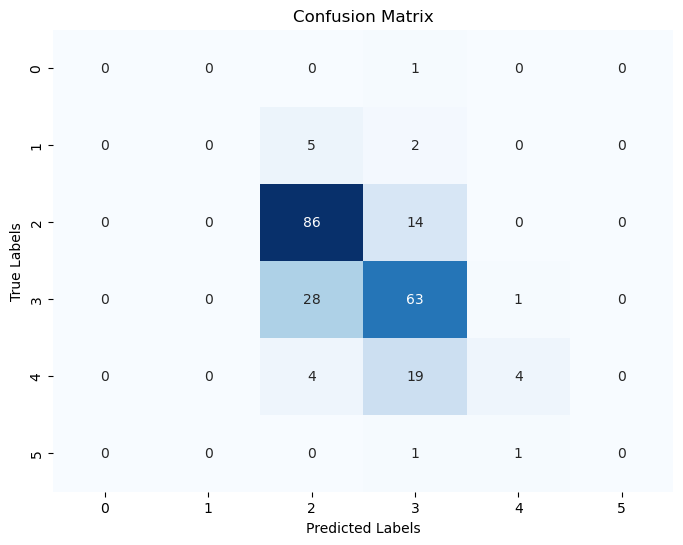

In [48]:
cm = confusion_matrix(y_test, prediction)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [50]:
precision = precision_score(y_test, prediction, average='weighted')
recall = recall_score(y_test, prediction, average='weighted')
f1 = f1_score(y_test, prediction, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 0.6370248872794405
Recall: 0.6681222707423581
F1-score: 0.6290414820458685


C:\Users\user\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
